The plan:

Create pandas dataframes.  Four will contain timeseries data for the ensemble mean, and another four will contain the ensemble spread at each specified sensor location coordinate.  Another will contain satellite data for that coordinate.  Extract data from the netcdf files in numpy as needed. Simplify the netcdf files by selecting only the needed coordinates.  Keep ensemble members separated only in the netcdf files.

In [1]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
plt.rcParams['figure.figsize'] = [9, 9]

In [2]:
data_files = glob('data_crop*.nc')
res_files = glob('2014*Z.nc')
data_sample = data_files[0]
res_sample = res_files[0]
coordx = [258,260,262,264]
coordy = [63.5,65,67,69]

In [4]:
# Build the pd dataframe containing all of the satellite values
data_times = np.empty(0,dtype=np.datetime64)
coord_ci = []
for i in range(len(coordx)):
    coord_ci.append([])
#data_ci = np.array([],shape=(len(coordx),0))
#data_ci
#data_ci[0].extend([1])
#data_ci
#data_ds = xr.open_dataset(data_sample)
#data_ci = data_ds.data_vars['ci']
#t=data_ds.time.values
#a=np.concatenate([data_times,t])
#df = pd.DataFrame({0:np.zeros(len(t))},index=t)
#print(df)
#
#for i in range(len(coordx)):
#    x = coordx[i]
#    y = coordy[i]
#    ci = data_ci.sel(west_east=x,south_north=y).values
#    print(ci)
#    df[i]=ci
#    print(df)

for data_file in data_files:
    data_ds = xr.open_dataset(data_file)
    data_times = np.concatenate([data_times,data_ds.time.values])
    data_ci = data_ds.data_vars['ci']
    for i in range(len(coordx)):
        x = coordx[i]
        y = coordy[i]
        ci = data_ci.sel(west_east=x,south_north=y).values
        coord_ci[i].extend(ci)

coord_ci = np.array(coord_ci)
data_df = pd.DataFrame({0:np.zeros(len(data_times))},index=data_times)
for i in range(len(coordx)):
    data_df[i]=coord_ci[i]
print(data_df.index,data_df.columns)

DatetimeIndex(['2014-04-02 16:30:00', '2014-04-02 16:45:00',
               '2014-04-02 17:00:00', '2014-04-02 17:15:00',
               '2014-04-02 17:30:00', '2014-04-02 17:45:00',
               '2014-04-02 18:00:00', '2014-04-02 18:30:00',
               '2014-04-02 18:45:00', '2014-04-02 19:00:00',
               ...
               '2014-06-22 19:45:00', '2014-06-22 20:00:00',
               '2014-06-22 20:15:00', '2014-06-22 20:30:00',
               '2014-06-22 21:00:00', '2014-06-22 21:30:00',
               '2014-06-22 21:45:00', '2014-06-22 22:00:00',
               '2014-06-22 22:15:00', '2014-06-22 22:30:00'],
              dtype='datetime64[ns]', length=840, freq=None) Int64Index([0, 1, 2, 3], dtype='int64')


In [193]:
res_avg15_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_std15_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_avg30_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_std30_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_avg45_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_std45_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_avg60_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
res_std60_df = pd.DataFrame(index=data_df.index,columns=data_df.columns)
thresh = 0.1
for res_file in res_files:
    print(res_file)
    res_ds = xr.open_dataset(res_file)
    res_ci = res_ds.data_vars['ci'].isel(time=slice(1,5))
    if(np.average(res_ci.values)>thresh):
        continue
    res_times = res_ci.time.values
    for c in range(len(coordx)):
        x = coordx[c]
        y = coordy[c]
        ci = res_ci.sel(west_east=x,south_north=y)
        for f in range(4):
            ci_avg = np.average(ci[f].values)
            ci_std = np.std(ci[f].values)
            try:
                if(f==0):
                    res_avg15_df.at[res_times[f],c] = ci_avg
                    res_std15_df.at[res_times[f],c] = ci_std
                elif(f==1):
                    res_avg30_df.at[res_times[f],c] = ci_avg
                    res_std30_df.at[res_times[f],c] = ci_std
                elif(f==2):
                    res_avg45_df.at[res_times[f],c] = ci_avg
                    res_std45_df.at[res_times[f],c] = ci_std
                elif(f==3):
                    res_avg60_df.at[res_times[f],c] = ci_avg
                    res_std60_df.at[res_times[f],c] = ci_std
            except:
                continue

print(res_avg15_df)
print(res_avg60_df)


20140402_1630Z.nc
20140402_1645Z.nc
20140402_1700Z.nc
20140402_1715Z.nc
20140402_1730Z.nc
20140402_1745Z.nc
20140402_1800Z.nc
20140402_1830Z.nc
20140402_1845Z.nc
20140402_1900Z.nc
20140402_1915Z.nc
20140402_1930Z.nc
20140402_1945Z.nc
20140402_2000Z.nc
20140402_2015Z.nc
20140402_2030Z.nc
20140402_2100Z.nc
20140402_2130Z.nc
20140402_2145Z.nc
20140402_2200Z.nc
20140402_2215Z.nc
20140402_2230Z.nc
20140405_1630Z.nc
20140405_1645Z.nc
20140405_1700Z.nc
20140405_1715Z.nc
20140405_1730Z.nc
20140405_1745Z.nc
20140405_1800Z.nc
20140405_1830Z.nc
20140405_1845Z.nc
20140405_1900Z.nc
20140405_1915Z.nc
20140405_1930Z.nc
20140405_1945Z.nc
20140405_2000Z.nc
20140405_2015Z.nc
20140405_2030Z.nc
20140405_2100Z.nc
20140405_2130Z.nc
20140405_2145Z.nc
20140405_2200Z.nc
20140405_2215Z.nc
20140405_2230Z.nc
20140409_1630Z.nc
20140409_1645Z.nc
20140409_1700Z.nc
20140409_1715Z.nc
20140409_1730Z.nc
20140409_1745Z.nc
20140409_1800Z.nc
20140409_1830Z.nc
20140409_1845Z.nc
20140409_1900Z.nc
20140409_1915Z.nc
20140409_1

20140521_1730Z.nc
20140521_1745Z.nc
20140521_1800Z.nc
20140521_1830Z.nc
20140521_1845Z.nc
20140521_1900Z.nc
20140521_1915Z.nc
20140521_1930Z.nc
20140521_1945Z.nc
20140521_2000Z.nc
20140521_2015Z.nc
20140521_2030Z.nc
20140521_2100Z.nc
20140521_2130Z.nc
20140521_2145Z.nc
20140521_2200Z.nc
20140521_2215Z.nc
20140521_2230Z.nc
20140522_1630Z.nc
20140522_1645Z.nc
20140522_1700Z.nc
20140522_1715Z.nc
20140522_1745Z.nc
20140522_1800Z.nc
20140522_1845Z.nc
20140522_1900Z.nc
20140522_1915Z.nc
20140522_1930Z.nc
20140522_1945Z.nc
20140522_2015Z.nc
20140522_2030Z.nc
20140522_2100Z.nc
20140522_2130Z.nc
20140522_2145Z.nc
20140522_2200Z.nc
20140522_2215Z.nc
20140522_2230Z.nc
20140523_1630Z.nc
20140523_1645Z.nc
20140523_1700Z.nc
20140523_1715Z.nc
20140523_1730Z.nc
20140523_1745Z.nc
20140523_1800Z.nc
20140523_1830Z.nc
20140523_1845Z.nc
20140523_1900Z.nc
20140523_1915Z.nc
20140523_1930Z.nc
20140523_1945Z.nc
20140523_2000Z.nc
20140523_2030Z.nc
20140523_2100Z.nc
20140523_2130Z.nc
20140523_2145Z.nc
20140523_2

[947 rows x 4 columns]
                              0           1           2           3
2014-04-02 16:30:00         NaN         NaN         NaN         NaN
2014-04-02 16:45:00         NaN         NaN         NaN         NaN
2014-04-02 17:00:00         NaN         NaN         NaN         NaN
2014-04-02 17:15:00         NaN         NaN         NaN         NaN
2014-04-02 17:30:00         NaN         NaN         NaN         NaN
2014-04-02 17:45:00   0.0296083   0.0314084   0.0322262   0.0305851
2014-04-02 18:00:00   0.0200728    0.019053   0.0199329   0.0238558
2014-04-02 18:30:00   0.0257263   0.0237779    0.028318   0.0281136
2014-04-02 18:45:00   0.0547108   0.0426686   0.0413366   0.0403848
2014-04-02 19:00:00   0.0751372   0.0781263   0.0702844   0.0702157
2014-04-02 19:15:00         NaN         NaN         NaN         NaN
2014-04-02 19:30:00   0.0364512   0.0334911   0.0425551    0.054543
2014-04-02 19:45:00   0.0840954   0.0863463   0.0739031   0.0671813
2014-04-02 20:00:00      

In [194]:
err15_df = (res_avg15_df-data_df).abs()
err30_df = (res_avg30_df-data_df).abs()
err45_df = (res_avg45_df-data_df).abs()
err60_df = (res_avg60_df-data_df).abs()


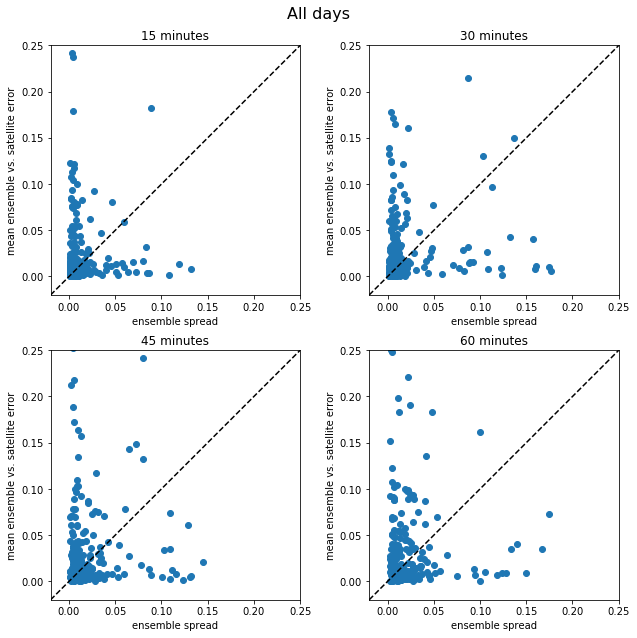

In [197]:
coord = 1
xmin = -0.02
ymin = xmin
xmax = 0.25
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols) 
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("ensemble spread")
        axarr[r,c].set_ylabel("abs(mean ensemble - satellite)")
axarr[0,0].scatter(res_std15_df[coord].values,err15_df[coord].values)
axarr[0,0].set_title("15 minutes")
axarr[0,1].scatter(res_std30_df[coord].values,err30_df[coord].values)
axarr[0,1].set_title("30 minutes")
axarr[1,0].scatter(res_std45_df[coord].values,err45_df[coord].values)
axarr[1,0].set_title("45 minutes")
axarr[1,1].scatter(res_std60_df[coord].values,err60_df[coord].values)
axarr[1,1].set_title("60 minutes")
fig.tight_layout()
fig.suptitle("All days",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

Next task is to identify which points belong to clear or cloudy days.
Notes 2/12:
Instead of 250 by 250 m comparison, use 1 km by 1 km scale comparisons. Cut off bottom and right of error domain if needed to get divisible dimensions on each side.
Focus on 3 case study days, send above to Travis.
Brier score, Continuous rank probability score, will it be clear or not? Reliability diagrams
BS = sum over all times of (f_i = n_i of event happening / 20 ensemble members - o_i = 1 of occurs and 0 if not)^2
Try looking at reliability diagrams, remember sciket learn
histograms to go along with the diagrams, play around with the threshold for a clear value